# Keras with Tensorflow

After you have seen PyTorch in action, making your own neural networks might look overwhelming, right? So we have Keras to your rescue!

While PyTorch, is essential for understanding how a neural nets are working, and how all you study can actually be put to work, it is not necessary for you to get your head around the nitty-gritty details of writing classes, defining the right functions. You can say that you can drive a car without knowing how the engine works. This is what high-level wrapper APIs like Keras or Fast.ai do.



## TensorFlow

> TensorFlow is a computational framework for building machine learning models. It is the second generation system from Google Brain headed by Jeff Dean. Launched in early 2017, it has disrupted the ML world by bringing in numerous capabilities from scalability to building production ready models. 

In short and simple words, Tensorflow is same(**more complicated and tough**) low-level library for deep learning as PyTorch. Okay, if you like it difficult, go play with Tensorflow in C++.

![TensorFlow toolkit hierarchy ](https://rviews.rstudio.com/post/2017-12-7-Rickert-TensorFlow_files/tfestimators.png)



But we won't be discussing much of TensorFlow as it might go overboard for a beginner.

##Keras

> Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

So, what can we do with Keras?

* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
* Supports both convolutional networks and recurrent networks, as well as combinations of the two.
* Runs seamlessly on CPU and GPU.

### Installation

**Step 1:** Install Tensorflow, you can find the instructions [here](https://www.tensorflow.org/install/pip).

**Step 2:** Install Keras 


In [1]:
!pip3 install keras

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# So let's make Neural Nets uncool again! ;)

Let's get started by Keras and all necessary modules that we will be needing during this tutorial.

**Note:** This notebook runs in parallel with the Pytorch notebook, so you can actually compare what suits you, and understand the difference between the two.

In [4]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

# Some beautification
from IPython.display import display, HTML
%matplotlib inline

### Important Note

Keras works with neural networks in terms of layers, so you don't need to care much about how you would define, activation functions, optimizers, or any other. Everything is in-built in Keras as paramters of the layers you add. Even activation is defined as a layer which you will see later.

Keras is about enabling fast on-the-fly experimentation, so you just need to follow these basic steps to train you neural network and get your predictions from it, in most cases:


0. Think about your neural network
1. Import(and preprocess) data
2. Define your neural network/model
3. Compile your model
4. Define the callbacks if any
5. Call the `fit` method to train
6. Evaluate your model, using validation or `evaluate` method
7. Predict using `predict` method



## 1. Import Data

We will be using the MNIST Dataset again.

Let's download the data, and split it into train and test sets:

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Also let's print out the shape of our data:

In [6]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

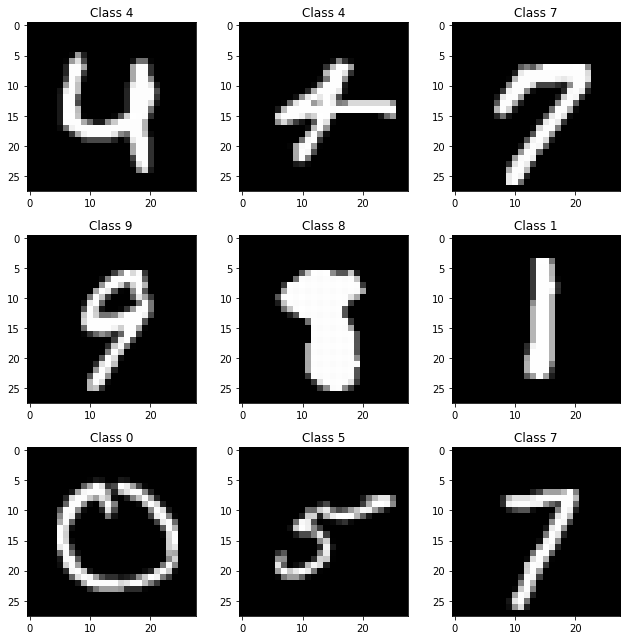

In [7]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Let's examine a single digit a little closer, and print out the array representing a digit.

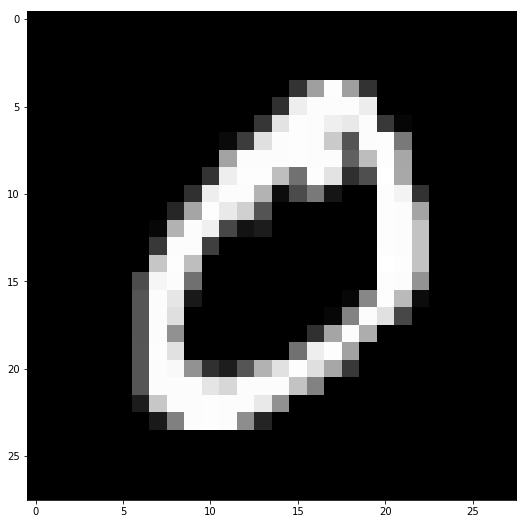

0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0    0   51  159  253  159   50    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0    0   48  238  252  252  252  237    0    0    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0    0    0   54  227  253  252  239  233  252   57    6    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0   10   60  224  252  253  252  202   84  252  253  122    0  0  0  0  0  0  
0  0  0  0  0  0   0    0    0    0    0  163  252  252 

In [8]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")


digit = X_train[1]

plt.imshow(digit, cmap='gray', interpolation='none')
plt.show()
matprint(digit)


Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white. This what we call a single-channel pixel. It's called monochrome.

## 1.1 Preprocessing

nstead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. Normalizing inputs is generally recommended, so that any additional dimensions (for other network architectures) are of the same scale.

![Flattening](https://raw.githubusercontent.com/AviatorMoser/keras-mnist-tutorial/master/flatten.png)

In [9]:
import keras.utils as np_utils

X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

# X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
# X_test /= 255

X_train = np_utils.normalize(X_train, axis=-1)
X_test = np_utils.normalize(X_test, axis=-1)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

This is done by `to_categorical` method provided in Keras utils.

In [10]:
import keras.utils as np_utils

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## 2. Define your model

Like PyTorch, there are two ways you can define your neural networks:

1. Sequential Model Approach
2. Functional Model Approach

We will be building the same network as we did in Pytorch to understand the difference between both the frameworks better.

![Neural Network](https://i.ibb.co/6tsgXYj/mlp-mnist.png)



### 2.1 Sequential Model

As the name says, sequential model is simply a sequence of layers added one after another to make a model. The Sequential model API is great for developing deep learning models in most situations, but it also has some limitations. For example, it is not straightforward to define models that may have multiple different input sources, produce multiple output destinations or models that re-use layers.

Official Documentation for Core Layers is given [here](https://keras.io/layers/core/).

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


And the best part about keras is that you can see your model summary, so that can you can be sure about what you built.

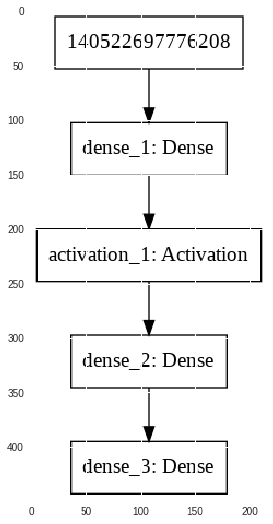

In [10]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

from PIL import Image

im = Image.open('model.png')
plt.imshow(im)
plt.show()

### 2.2 Functional Model

The Keras functional API provides a more flexible way for defining models. It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

As the name suggests, now layers are defined as functions, for example every Dense layer is a function with some parameters and takes some input and gives an output, giving us more control over each layer.

In [9]:
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(784,))
x = Dense(128, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


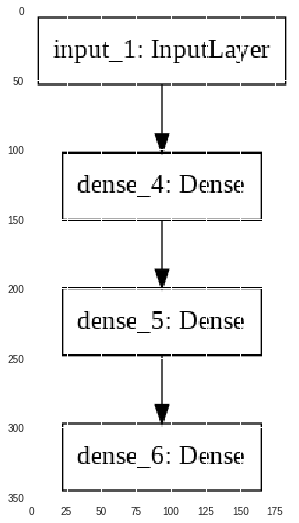

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

from PIL import Image

im = Image.open('model.png')
plt.imshow(im)
plt.show()

If you are curious about how you can further customize your models, you can refer a post [here](https://machinelearningmastery.com/keras-functional-api-deep-learning/) which talks about all possible models you can make with the Functional API.

## 3. Compile Your Model

After defining a model you need to compile it, which means you need to define an optimizer, loss function, and other optional parameters like metrics you want to monitor.

Selecting an optimizer and loss function as easy as picking swiping a credit card.

Official Documentation of Loss Fucntions can be found [here](https://keras.io/losses/).

Official Documentation of Optimizers can be found [here](https://keras.io/optimizers/).

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

That's it, done! It initializes 'adam' optimizer with default values and sets the loss to cross-entropy.

Suppose you want to customize some parameters about the optimizer, well that's easy too.

In [11]:
# suppose we wanted to set learning rate to 0.01
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

## 4. Define Callbacks

Well, this is why I like Keras better than any other frameworks, Keras has got a lot of powerful callbacks that help you achieve complex functionality on'-the-fly, while you are training your model.

A callback is a function that is to be executed after another function has finished executing — hence the name ‘call back’. In Keras, callbacks are functions invoked after every epoch.

Though there are a lot of pre-defined callbacks in Keras, and you can also define your own custom callback easily, we will be dicussing two popular callbacks for now:

### 4.1 Tensorboard

TensorBoard is a visualization tool provided with TensorFlow. With the help of Tensorboard, you can keep log of multiple training attributes, over multiple models, compare and visualize them as you will see soon.

In [13]:
import time
from keras.callbacks import TensorBoard

NAME = "Base-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='./logs/{}'.format(NAME))

### 4.2 EarlyStopping

This callbback helps us to stop training when a monitored quantity has stopped improving. 

In our case we will be monitoring validation loss, so let's initialize the callback.

In [14]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss', patience=0, mode='min')

## 5. Train your model

Finally, after doing all this, let's train our model by passing the the features and target, and other parameters to the `fit` method.

In [16]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          callbacks=[tensorboard, earlystop],
          validation_split=0.1,
          verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 34us/step - loss: 0.0494 - acc: 0.9854 - val_loss: 0.0791 - val_acc: 0.9770
Epoch 2/10
54000/54000 [==============================] - 2s 35us/step - loss: 0.0422 - acc: 0.9877 - val_loss: 0.0783 - val_acc: 0.9775
Epoch 3/10
54000/54000 [==============================] - ETA: 0s - loss: 0.0374 - acc: 0.989 - 2s 35us/step - loss: 0.0375 - acc: 0.9892 - val_loss: 0.0767 - val_acc: 0.9765
Epoch 4/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0330 - acc: 0.9898 - val_loss: 0.0758 - val_acc: 0.9783
Epoch 5/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0286 - acc: 0.9919 - val_loss: 0.0746 - val_acc: 0.9787
Epoch 6/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.0256 - acc: 0.9924 - val_loss: 0.0751 - val_acc: 0.9778


## 6. Evaluate the model

Keras has an easy `evaluate` method to evaluate your model on test data.

In [17]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 29us/step
Test score: 0.07186309540639632
Test accuracy: 0.9775


## 7. Prediction and Sanity Check

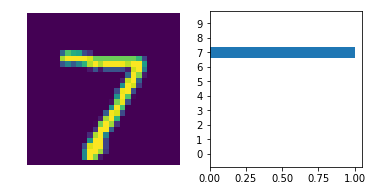

In [18]:
img = X_test[0]
ps = model.predict(img.reshape(-1,784))

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.reshape(28, 28))
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
plt.show()

## Saving and Load Model

You can easily save any model and its weights like this

In [19]:
# Save Model
model.save('mnist_model.h5')

# Delete the Model
del model

# Load the Model Again
from keras.models import load_model

model = load_model('mnist_model.h5')

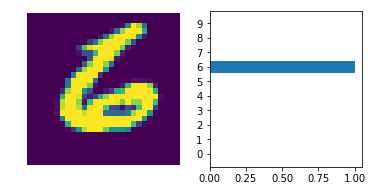

In [20]:
img = X_test[-1]
ps = model.predict(img.reshape(-1,784))

fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
ax1.imshow(img.reshape(28, 28))
ax1.axis('off')
ax2.barh(np.arange(10), ps[0])
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
plt.show()

## Tensorboard Logs & Experimenting

Tensorboard plots and visualization can be seen by runnig tensorboard through terminal:

`tensorboard --logdir=/full_path_to_your_logs`

Tensorboard plots are extremely helpful when you are testing out various model architectures, optimizers, loss functions, batch size, etc.

Let's look at the effect of batch sizes on training. The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find, an ideal use of tensorboard.

So let's wrap our model in a function since we will be calling it to train our model. Also, I removed early stopping to see what happens to our validation loss.

In [22]:
def run_model(name='unnamed', batch_size=128):

    inputs = Input(shape=(784,))
    x = Dense(128, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=predictions)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    NAME = name+"-{}".format(int(time.time()))

    tensorboard = TensorBoard(log_dir='./logs/{}'.format(NAME))

    print('Running Model of Batch Size', batch_size)
    model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=12,
          callbacks=[tensorboard],
          validation_split=0.1,
          verbose=0)

    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', score[1])

    return model

All set, let's go and tryout different batch sizes and find which fits the best.

In [23]:
# Batch Size 16
%timeit -n 1 -r 1 run_model(name='b16', batch_size=16)
print('\n')

# Batch Size 32
%timeit -n 1 -r 1 run_model(name='b32', batch_size=32)
print('\n')

# Batch Size 64
%timeit -n 1 -r 1 run_model(name='b64', batch_size=64)
print('\n')

# Batch Size 128
%timeit -n 1 -r 1 run_model(name='b128', batch_size=128)
print('\n')

# Batch Size 256
%timeit -n 1 -r 1 run_model(name='b256', batch_size=256)
print('\n')

# Batch Size 512
%timeit -n 1 -r 1 run_model(name='b512', batch_size=512)
print('\n')

# Batch Size 1024
%timeit -n 1 -r 1 run_model(name='b1024', batch_size=1024)
print('\n')

# Batch Size 2048
%timeit -n 1 -r 1 run_model(name='b2048', batch_size=2048)
print('\n')

Running Model of Batch Size 16
Test accuracy: 0.9797
1min 58s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 32
Test accuracy: 0.9788
1min 10s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 64
Test accuracy: 0.9757
38.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 128
Test accuracy: 0.9745
24.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 256
Test accuracy: 0.9707
18.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 512
Test accuracy: 0.966
18.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 1024
Test accuracy: 0.954
15.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running Model of Batch Size 2048
Test accuracy: 0.9403
15.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)




## Bonus: What if?!

What if you don't want to preprocess the input using numpy, can we actually just make our model and get on with it?

Definetely we can! As mentioned before Keras is meant for on-the-fly experimentation, and there are multiple layers that can handle simple preprocessing on the go, so there's hardly any need for preprocessing in this case. 

Let's reload our data, since we already pre-processed it.


In [20]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Now, let's define our model with some Advanced Layers.

In [21]:
from keras.layers import Flatten, Lambda

inputs = Input(shape=(28,28,))
x = Flatten()(inputs)
x = Lambda(lambda x: x/255)(x)
out = x

model = Model(inputs=inputs, outputs=out)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 784)               0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [118]:
some = np.random.randint(255, size=(1,28,28))
pd.DataFrame(some[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,230,237,202,8,65,106,119,81,251,155,...,113,170,98,223,138,109,73,32,243,140
1,55,95,84,13,9,153,200,130,182,174,...,23,92,69,121,163,121,176,240,226,233
2,14,47,9,33,47,58,142,6,253,34,...,51,167,48,119,9,231,190,105,137,249
3,243,131,190,17,12,174,70,193,152,130,...,235,237,155,77,10,135,122,219,8,202
4,115,35,188,84,114,180,3,85,58,11,...,85,208,139,94,254,67,247,109,147,250
5,69,96,61,12,114,227,97,254,198,57,...,42,59,19,10,253,244,3,218,191,215
6,250,32,30,54,17,155,238,8,188,220,...,64,234,49,141,167,54,207,193,204,5
7,67,52,230,58,8,196,124,175,135,116,...,37,71,61,46,233,97,10,6,160,74
8,209,119,250,102,115,215,150,71,198,227,...,179,157,158,188,193,227,197,85,101,235
9,95,233,183,252,88,27,250,69,21,126,...,181,124,48,82,251,51,227,118,104,125


In [57]:
pred = model.predict(some)
pd.DataFrame(pred)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.090196,0.388235,0.439216,0.827451,0.219608,0.890196,0.733333,0.298039,0.043137,0.423529,...,0.741176,0.270588,0.309804,0.901961,0.878431,0.592157,0.552941,0.388235,0.023529,0.858824


In [55]:
inputs = Input(shape=(28,28,))
x = Flatten()(inputs)
x = Lambda(lambda x: x/255)(x)d
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
out = Dense(1, activation='relu')(x)
model = Model(inputs=inputs, outputs=out)

model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

NAME = "custom_model-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='./logs/{}'.format(NAME))

print('Running Custom Model')
%timeit -n 1 -r 1 model.fit(X_train, y_train, batch_size=128, epochs=100, callbacks=[tensorboard], validation_split=0.1)

score = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', score[1])

Running Custom Model
Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 3s 47us/step - loss: 20.7977 - acc: 0.1161 - val_loss: 10.6606 - val_acc: 0.1960
Epoch 2/100
54000/54000 [==============================] - 2s 41us/step - loss: 7.1819 - acc: 0.2584 - val_loss: 4.0817 - val_acc: 0.2900
Epoch 3/100
54000/54000 [==============================] - 2s 42us/step - loss: 3.0138 - acc: 0.3393 - val_loss: 2.0448 - val_acc: 0.3662
Epoch 4/100
54000/54000 [==============================] - 2s 41us/step - loss: 1.5494 - acc: 0.4626 - val_loss: 0.9919 - val_acc: 0.6270
Epoch 5/100
54000/54000 [==============================] - 2s 43us/step - loss: 0.8538 - acc: 0.6521 - val_loss: 0.6693 - val_acc: 0.6765
Epoch 6/100
54000/54000 [==============================] - 2s 43us/step - loss: 0.6090 - acc: 0.6905 - val_loss: 0.5707 - val_acc: 0.7160
Epoch 7/100
54000/54000 [==============================] - 2s 44us/step - loss: 0.4897 - acc: 0.7307

In [60]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [122]:
inputs = Input(shape=(28,28,))
x = Flatten()(inputs)
x = Lambda(lambda x: x/255)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
out = Dense(10, activation='softmax')(x)
model = Model(inputs=inputs, outputs=out)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NAME = "custom_cat-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir='./logs/{}'.format(NAME))

print('Running Custom Model')
%timeit -n 1 -r 1 model.fit(X_train, Y_train, batch_size=128, epochs=12, callbacks=[tensorboard], validation_split=0.1)

score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])

Running Custom Model
Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 4s 75us/step - loss: 0.3581 - acc: 0.8991 - val_loss: 0.1389 - val_acc: 0.9597
Epoch 2/12
54000/54000 [==============================] - 4s 65us/step - loss: 0.1426 - acc: 0.9582 - val_loss: 0.1089 - val_acc: 0.9710
Epoch 3/12
54000/54000 [==============================] - 3s 63us/step - loss: 0.0991 - acc: 0.9705 - val_loss: 0.0928 - val_acc: 0.9740
Epoch 4/12
54000/54000 [==============================] - 4s 69us/step - loss: 0.0762 - acc: 0.9774 - val_loss: 0.0885 - val_acc: 0.9728
Epoch 5/12
54000/54000 [==============================] - 4s 68us/step - loss: 0.0611 - acc: 0.9817 - val_loss: 0.0881 - val_acc: 0.9723
Epoch 6/12
54000/54000 [==============================] - 3s 65us/step - loss: 0.0485 - acc: 0.9850 - val_loss: 0.0917 - val_acc: 0.9727
Epoch 7/12
54000/54000 [==============================] - 4s 67us/step - loss: 0.0403 - acc: 0.9876 - val_lo

**Which is better?**

Well, it mostly depends on the type of preprocessing required and the use-case, but in our case the above example, it is obviously not good as adding preprocessing layers adds to training time of the network thus it is not good since we do preprocess every time in an epoch. However, it can be debated as the preprocessing is now also done on GPU. 

On the other hand some model requiring some kind of processing on embeddings, the latter would be effective.



---

# Fin. Happy Coding!